# Imports and Processing

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
mr1_path = '../data/processed/consensus_resolution/meta_reviews_final.csv'
mr2_path = '../data/processed/consensus_resolution/meta_reviews_batch_2.csv'

In [4]:
mr1 = pd.read_csv(mr1_path)
mr2 = pd.read_csv(mr2_path)

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/consensus_resolution/meta_reviews_batch_2.csv'

In [4]:
mr1.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
mr1.head(), len(mr1)

(                paper_id                                        meta_review
 0  iclr_2022_jaLDP8Hp_gc  \boxed{The paper "Visual Correspondence Halluc...
 1   iclr_2019_B1xsqj09Fm  \boxed{```json\n{\n  "meta_review": "# Meta-Re...
 2   iclr_2020_BJeXaJHKvB  \boxed{```markdown\n#### Meta-Review\n\n**Titl...
 3  nips_2022_2ge7_pORL_n  \boxed{```json\n{\n  "summary": "The paper \"B...
 4    iclr_2018_SyVVXngRW  \boxed{```markdown\n#### Meta-review: "Deep As...,
 99)

In [5]:
mr2.head(), len(mr2)

(                paper_id                                        meta_review
 0  iclr_2022_GBszJ1XlKDj  \boxed{"Based on evaluations outlining the str...
 1  iclr_2022_eIvzaLx6nKW  \boxed{\nThe paper "Multi-Domain Self-Supervis...
 2  iclr_2022_P7OVkHEoHOZ  \boxed{\boxed{```markdown\n**Meta-Review for "...
 3   iclr_2020_Hke12T4KPS  \boxed{\nThe paper "Using Hindsight to Anchor ...
 4   nips_2022_Ryy7tVvBUk  \boxed{\n```markdown\n### Meta-Review of "Pred...,
 85)

In [6]:
aggregated_mr = pd.concat([mr1, mr2])
aggregated_mr.head(), len(aggregated_mr)

(                paper_id                                        meta_review
 0  iclr_2022_jaLDP8Hp_gc  \boxed{The paper "Visual Correspondence Halluc...
 1   iclr_2019_B1xsqj09Fm  \boxed{```json\n{\n  "meta_review": "# Meta-Re...
 2   iclr_2020_BJeXaJHKvB  \boxed{```markdown\n#### Meta-Review\n\n**Titl...
 3  nips_2022_2ge7_pORL_n  \boxed{```json\n{\n  "summary": "The paper \"B...
 4    iclr_2018_SyVVXngRW  \boxed{```markdown\n#### Meta-review: "Deep As...,
 184)

In [7]:
aggregated_mr.to_csv('../data/processed/consensus_resolution/aggregated_mr.csv', index=False)

In [5]:
resolution_path = '../data/processed/consensus_resolution/aggregated_dr.csv'
original_meta_reviews_path = '../data/processed/search/aggregated_papers_with_search.csv'
generated_meta_reviews_path = '../data/processed/consensus_resolution/aggregated_mr.csv'

In [7]:
original = pd.read_csv(original_meta_reviews_path)
original.head()

,paper_id,paper_title,paper_abstract,paper_acceptance,meta_review,label,review_ids,review_writers,review_contents,review_ratings,review_confidences,review_reply_tos,critique_points,meta_review_critique,SoTA Results,Combined Critiques,Retrieved Evidence
0,iclr_2022_jaLDP8Hp_gc,Visual Correspondence Hallucination,Given a pair of partially overlapping source a...,Accept (Poster),This paper receives positive reviews. The auth...,train,"['EkXSobQaGSX', 't_m188ir-01', 'aB-aAw0xvHi', ...","['author', 'official_reviewer', 'official_revi...","[' Thank you for your reply, please find our r...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, 8, 5, 8]","[-1, -1, -1, -1, -1, -1, -1, -1, -1, 4, 4, 3]","['9MQG_FP3eQB', 'Lv3RrS-8N1T', 'F5nhRjo6xc', '...","[{'Methodology': [], 'Experiments': [], 'Clari...","{'Methodology': [], 'Experiments': [], 'Clarit...","""Act Like a Radiologist: Towards Reliable Mult...",{'Methodology': 'Enhance the baseline with a g...,{'Methodology': 'Finding specific papers that ...
1,iclr_2019_B1xsqj09Fm,Large Scale GAN Training for High Fidelity Nat...,Despite recent progress in generative image mo...,accepted-oral-papers,The paper proposes a set of tricks leading to ...,train,"['SJl68_Hx37', 'SkgkCbBm0Q', 'Syxd9-HXAQ', 'r1...","['official_reviewer', 'author', 'author', 'aut...",['This paper present extensions of the Self-At...,"[9, -1, -1, -1, -1, -1, 7, 8, -1, -1, -1, -1, ...","[4, -1, -1, -1, -1, -1, 3, 4, -1, -1, -1, -1, ...","['iclr_2019_B1xsqj09Fm', 'SJl68_Hx37', 'r1gI_-...",[{'Methodology': ['Increasing the batch size b...,"{'Methodology': [], 'Experiments': [], 'Clarit...","Recent research related to ""Large Scale GAN Tr...","{'Methodology': ""Increasing the batch size by ...","{'Methodology': ""Based on the searches, here's..."
2,iclr_2020_BJeXaJHKvB,P-BN: Towards Effective Batch Normalization in...,Neural networks with ReLU activation functions...,reject,This paper addresses the extension of path-spa...,train,"['HygQZEdrir', 'BygbSE_riH', 'BJl__VdBiH', 'ry...","['author', 'author', 'author', 'author', 'offi...",['Thank you for your comments. The following i...,"[-1, -1, -1, -1, 3, 3, 3]","[-1, -1, -1, -1, 4, 4, 1]","['ryeSKamyoB', 'HkxkpF_j5S', 'r1leWJ7TYr', 'ic...",[{'Methodology': ['The paper does not motivate...,{'Methodology': ['The paper extends path-space...,"The paper ""Path-BN: Towards effective batch no...",{'Methodology': 'The paper does not motivate t...,"{'Methodology': ""The provided research papers ..."
3,nips_2022_2ge7_pORL_n,BiMLP: Compact Binary Architectures for Vision...,This paper studies the problem of designing co...,Accept,Four reviewers provided feedback on this paper...,train,"['j0xSlomDUSe', 'KBmpimZpkQD', 'O4eCZ0ts34E', ...","['official_reviewer', 'official_reviewer', 'of...","["" Thanks for your response. I don't have more...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 4, 5,...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 4, 3,...","['lMqMcmUp-1O', 'PDLVUcRKcB3', 'Smfma6uKX7F', ...","[{'Methodology': [], 'Experiments': [], 'Clari...","{'Methodology': [], 'Experiments': ['The appro...",I was unable to find specific papers citing th...,"{'Methodology': ""The author is suggested to ad...",{'Methodology': 'After conducting several sear...
4,iclr_2018_SyVVXngRW,Deep Asymmetric Multi-task Feature Learning,We propose Deep Asymmetric Multitask Feature L...,rejected-papers,The paper proposes a multitask deep learning m...,train,"['ryAf2-ugz', 'H11NN0KgG', 'S1T4ik9ef']","['official_reviewer', 'official_reviewer', 'of...","[""This paper presents a deep asymmetric multi-...","[6, 3, 5]","[4, 4, 4]","['iclr_2018_SyVVXngRW', 'iclr_2018_SyVVXngRW',...","[{'Methodology': [], 'Experiments': ['In real-...","{'Methodology': [], 'Experiments': ['limited e...",Two recent papers that appear relevant based o...,{'Methodology': 'Matrix B in Eq.(4) and Matrix...,{'Methodology': 'Several research papers provi...


In [8]:
len(original)

200

In [9]:
generated = pd.read_csv(generated_meta_reviews_path)
generated

,paper_id,meta_review
0,iclr_2022_jaLDP8Hp_gc,"\boxed{The paper ""Visual Correspondence Halluc..."
1,iclr_2019_B1xsqj09Fm,"\boxed{```json\n{\n ""meta_review"": ""# Meta-Re..."
2,iclr_2020_BJeXaJHKvB,\boxed{```markdown\n#### Meta-Review\n\n**Titl...
3,nips_2022_2ge7_pORL_n,"\boxed{```json\n{\n ""summary"": ""The paper \""B..."
4,iclr_2018_SyVVXngRW,"\boxed{```markdown\n#### Meta-review: ""Deep As..."
...,...,...
179,iclr_2022_Ihxw4h-JnC,"\boxed{The paper titled ""Stochastic Induction ..."
180,iclr_2019_BkN5UoAqF7,"\boxed{##### Structured Meta-Review for ""Sampl..."
181,iclr_2021_kmG8vRXTFv,"\boxed{```json\n{\n ""Meta-Review Score"": 9,..."
182,iclr_2022_xRK8xgFuiu,"\boxed{\n```json\n{\n ""meta_review_results"": ..."


-----

# Cosine Similarity

In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer("all-MiniLM-L6-v2")

c:\Users\TIRATH BHATHAWALA\Documents\intern\iit_patna\XAIPaper\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
original['meta_embeddings_original'] = original['meta_review'].apply(lambda x: model.encode(x))
generated['meta_embeddings_generated'] = generated['meta_review'].apply(lambda x: model.encode(x))

In [12]:
missing_in_generated = set(original["paper_id"]) - set(generated["paper_id"])
print(f"Missing in generated: {missing_in_generated}")

Missing in generated: {'nips_2021_PPh6lqP5BO', 'iclr_2020_r1gIa0NtDH', 'iclr_2022_GIEPR9OomyX', 'iclr_2021_TlPHO_duLv', 'nips_2022_uCBx_6Hc7cu', 'iclr_2020_Bkxonh4Ywr', 'iclr_2020_H1epaJSYDS', 'nips_2022_zp_Cp38qJE0', 'iclr_2020_SJg5J6NtDr', 'iclr_2022_aBO5SvgSt1', 'nips_2022__4xg5moXVg', 'iclr_2021_xH251EA80go', 'nips_2022_Euv1nXN98P3', 'nips_2022_ST5ZUlz_3w', 'iclr_2020_BJge3TNKwH', 'iclr_2022_N3KYKkSvciP'}


In [13]:
original = original[~original['paper_id'].isin(missing_in_generated)]
len(original)

184

In [14]:
similarity_df = original.merge(generated, on="paper_id", suffixes=("_original", "_generated"))

similarity_df["cosine_similarity"] = similarity_df.apply(
    lambda row: cosine_similarity(
        [row["meta_embeddings_original"]], 
        [row["meta_embeddings_generated"]]
    )[0][0], axis=1
)

In [15]:
similarity_df['cosine_similarity'].head()

0    0.013356
1    0.291365
2    0.657212
3    0.383461
4    0.689615
Name: cosine_similarity, dtype: float32

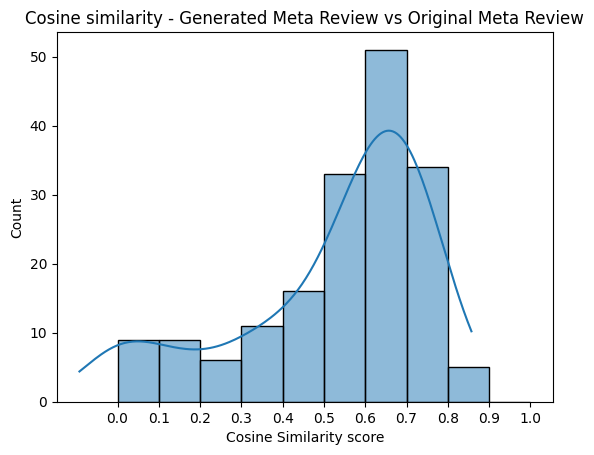

In [16]:
sns.histplot(data=similarity_df, x='cosine_similarity', kde=True, binrange=(0, 1), bins=10)
plt.title('Cosine similarity - Generated Meta Review vs Original Meta Review')
plt.xticks(np.arange(0, 1.01, 0.1))
plt.xlabel('Cosine Similarity score')
plt.show()

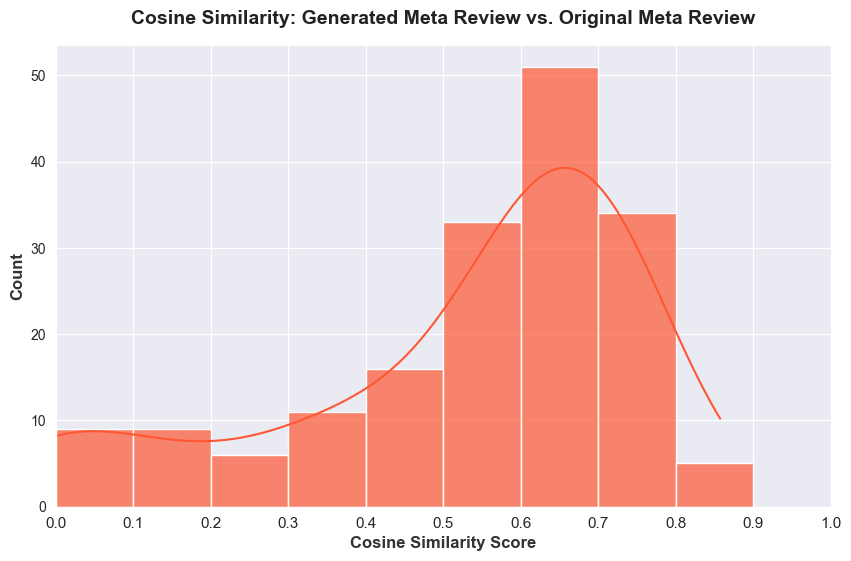

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Create a figure
plt.figure(figsize=(10, 6))

# Histogram with KDE
sns.histplot(
    data=similarity_df, 
    x='cosine_similarity', 
    kde=True, 
    bins=10, 
    binrange=(0, 1), 
    color="#FF5733",  # Custom color
    alpha=0.7  # Transparency
)

# Formatting labels and title
plt.title("Cosine Similarity: Generated Meta Review vs. Original Meta Review", 
          fontsize=14, fontweight="bold", color="#222222", pad=15)
plt.xlabel("Cosine Similarity Score", fontsize=12, fontweight="bold", color="#333333")
plt.ylabel("Count", fontsize=12, fontweight="bold", color="#333333")

# Customize x-ticks
plt.xticks(np.arange(0, 1.01, 0.1), fontsize=11)
plt.xlim(0, 1)  # Ensuring x-axis stays in [0,1] range

# Show the plot
plt.show()

###  AI-generated reviews are capturing the overall meaning fairly well

-----

# BLEU Score - n_gram precision

In [18]:
from nltk.translate.bleu_score import sentence_bleu

def compute_bleu_score(reference, hypothesis):
    return sentence_bleu([reference.split()], hypothesis.split())

# Apply BLEU score for each paper_id
generated["bleu_score"] = generated.apply(
    lambda row: compute_bleu_score(
        original.loc[original['paper_id'] == row['paper_id'], 'meta_review'].values[0], 
        row['meta_review']
    ), 
    axis=1
)

c:\Users\TIRATH BHATHAWALA\Documents\intern\iit_patna\XAIPaper\venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\TIRATH BHATHAWALA\Documents\intern\iit_patna\XAIPaper\venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\TIRATH BHATHAWALA\Documents\intern\iit_patna\XAIPaper\venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independen

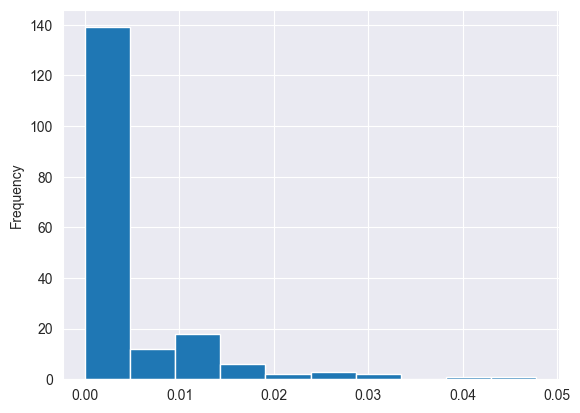

In [19]:
generated['bleu_score'].plot.hist()
plt.show()

# Rouge score -  recall and precision of overlapping phrases 

In [21]:
%pip install rouge_score


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=25025 sha256=dbcd9bede192422d6eb5bbf7fae5d17d8f500e4d961552f1899af46dccb71074
  Stored in directory: c:\users\tirath bhathawala\appdata\local\pip\cache\wheels\1e\19\43\8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [22]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd
from tqdm import tqdm

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Store scores
evaluation_scores = []

# Iterate through matching paper_id reviews
for _, row in tqdm(original.merge(generated, on='paper_id').iterrows(), total=len(original)):
    human_review = row['meta_review_x']  # From 'original'
    ai_review = row['meta_review_y']  # From 'generated'

    # Compute ROUGE scores
    rouge_scores = scorer.score(human_review, ai_review)
    
    # Compute BLEU score
    bleu_score = sentence_bleu([human_review.split()], ai_review.split())

    # Store results
    evaluation_scores.append({
        'paper_id': row['paper_id'],
        'rouge1': rouge_scores['rouge1'].fmeasure,
        'rougeL': rouge_scores['rougeL'].fmeasure,
        'bleu': bleu_score
    })

# Convert to DataFrame
scores_df = pd.DataFrame(evaluation_scores)

# Display results
print(scores_df.head())

  0%|          | 0/184 [00:00<?, ?it/s]c:\Users\TIRATH BHATHAWALA\Documents\intern\iit_patna\XAIPaper\venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\TIRATH BHATHAWALA\Documents\intern\iit_patna\XAIPaper\venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
  4%|▍         | 8/184 [00:00<00:04, 37.67it/s]c:\Users\TIRATH BHATHAWALA\Documents\intern\iit_patna\XAIPaper\venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis con

                paper_id    rouge1    rougeL           bleu
0  iclr_2022_jaLDP8Hp_gc  0.128878  0.085919  1.984035e-155
1   iclr_2019_B1xsqj09Fm  0.052174  0.042512  1.356827e-155
2   iclr_2020_BJeXaJHKvB  0.166979  0.095685   6.014302e-79
3  nips_2022_2ge7_pORL_n  0.274247  0.130435   9.380502e-79
4    iclr_2018_SyVVXngRW  0.091135  0.054681   3.770605e-79


# Jaccard Similarity -  word-level similarity based on the intersection over union of words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score

def jaccard_similarity(text1, text2):
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform([text1, text2]).toarray()
    return jaccard_score(X[0], X[1])

jaccard_df = pd.DataFrame(columns=['paper_id', 'Score'])
jaccard_df['paper_id'] = generated['paper_id']

original = original.set_index('paper_id')
generated = generated.set_index('paper_id')

for id in tqdm(jaccard_df['paper_id']):
    score = jaccard_similarity(original.loc[id, 'meta_review'], generated.loc[id, 'meta_review'])
    jaccard_df.loc[jaccard_df['paper_id'] == id, 'Score'] = score

100%|██████████| 184/184 [00:00<00:00, 468.22it/s]


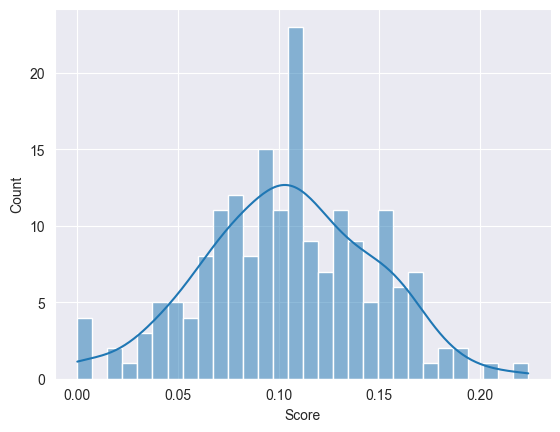

In [24]:
sns.histplot(data=jaccard_df, x='Score', kde=True, bins=30)
plt.show()

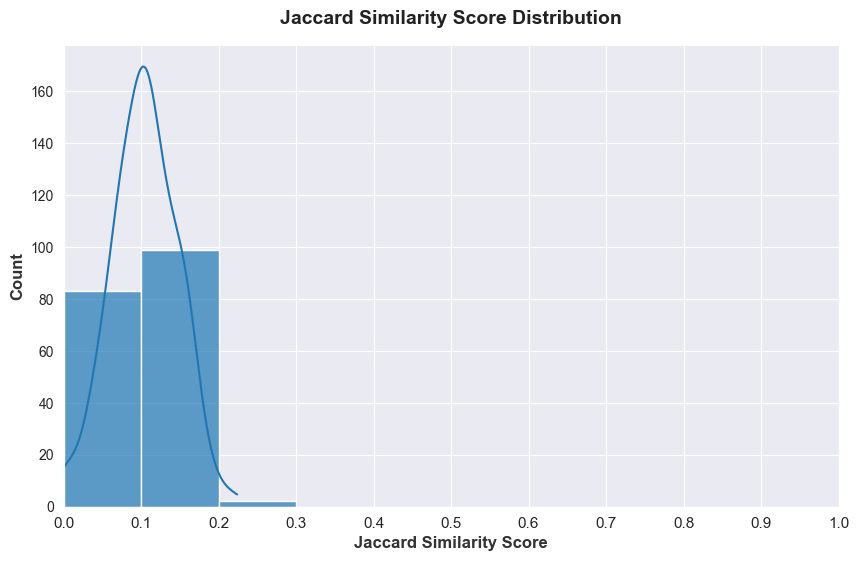

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Create figure
plt.figure(figsize=(10, 6))

# Define bins (0 to 1 with step of 0.1)
bins = np.arange(0, 1.1, 0.1)

# Histogram with KDE
sns.histplot(
    data=jaccard_df, 
    x='Score', 
    kde=True, 
    bins=bins, 
    color="#1f77b4",  # Custom color
    alpha=0.7  # Transparency
)

# Formatting labels and title
plt.title("Jaccard Similarity Score Distribution", 
          fontsize=14, fontweight="bold", color="#222222", pad=15)
plt.xlabel("Jaccard Similarity Score", fontsize=12, fontweight="bold", color="#333333")
plt.ylabel("Count", fontsize=12, fontweight="bold", color="#333333")

# Customize x-ticks
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=11)
plt.xlim(0, 1)  # Ensure x-axis stays in [0,1] range

# Show the plot
plt.show()

### AI Paraphrasing is different than humans.

###  AI-generated reviews are not copying exact words but are capturing the overall meaning fairly well

# BERT-Score

In [26]:
%pip install -q bert-score

Note: you may need to restart the kernel to use updated packages.


In [29]:
from bert_score import score
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


import logging
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)


# Create DataFrame for storing scores
bert_df = pd.DataFrame(columns=['paper_id', 'BERTScore_P', 'BERTScore_R', 'BERTScore_F1'])

for id in tqdm(generated.index):
    # Compute BERTScore (Precision, Recall, F1)
    P, R, F1 = score([original.loc[id, 'meta_review']], [generated.loc[id, 'meta_review']], device='cpu', lang='en', batch_size=16)
    # print(P, R, F1)

    bert_df.at[id, 'BERTScore_P'] = P.item()
    bert_df.at[id, 'BERTScore_R'] = R.item()
    bert_df.at[id, 'BERTScore_F1'] = F1.item()

  0%|          | 0/184 [02:48<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
bert_df

,paper_id,BERTScore_P,BERTScore_R,BERTScore_F1
iclr_2022_jaLDP8Hp_gc,NaN,0.852663,0.783529,0.816635
iclr_2019_B1xsqj09Fm,NaN,0.857369,0.768307,0.810399
iclr_2020_BJeXaJHKvB,NaN,0.828945,0.799241,0.813822
nips_2022_2ge7_pORL_n,NaN,0.8153,0.787208,0.801008
iclr_2018_SyVVXngRW,NaN,0.845153,0.790153,0.816728
...,...,...,...,...
iclr_2022_Ihxw4h-JnC,NaN,0.863076,0.762172,0.809492
iclr_2019_BkN5UoAqF7,NaN,0.825119,0.79757,0.811111
iclr_2021_kmG8vRXTFv,NaN,0.836296,0.79967,0.817573
iclr_2022_xRK8xgFuiu,NaN,0.809873,0.749366,0.778445


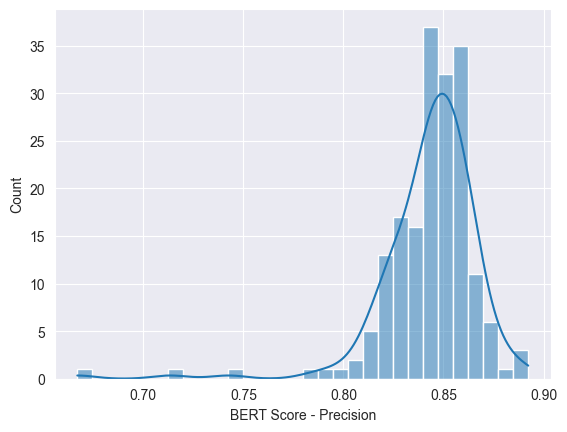

In [ ]:
sns.histplot(data=bert_df, x='BERTScore_P', kde=True, bins=30)
plt.xlabel('BERT Score - Precision')
plt.show()

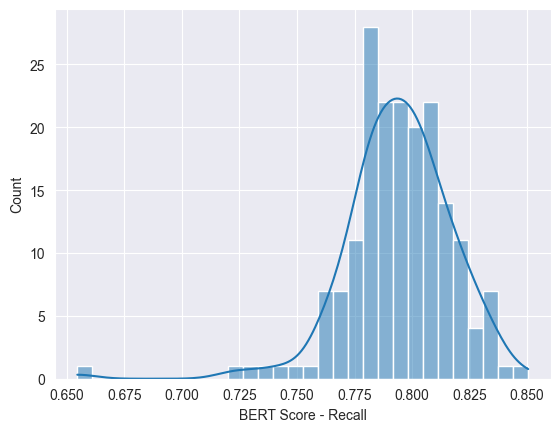

In [ ]:
sns.histplot(data=bert_df, x='BERTScore_R', kde=True, bins=30)
plt.xlabel('BERT Score - Recall')
plt.show()

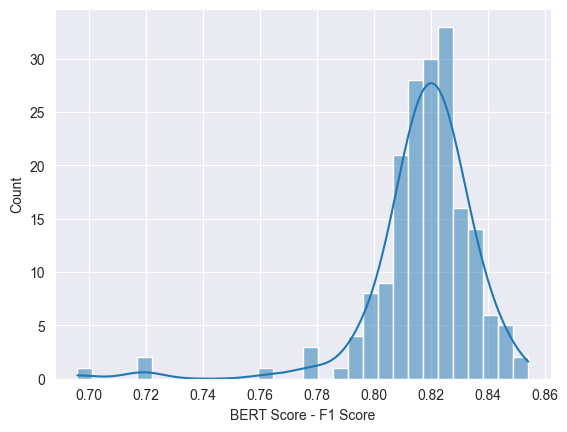

In [ ]:
sns.histplot(data=bert_df, x='BERTScore_F1', kde=True, bins=30)
plt.xlabel('BERT Score - F1 Score')
plt.show()

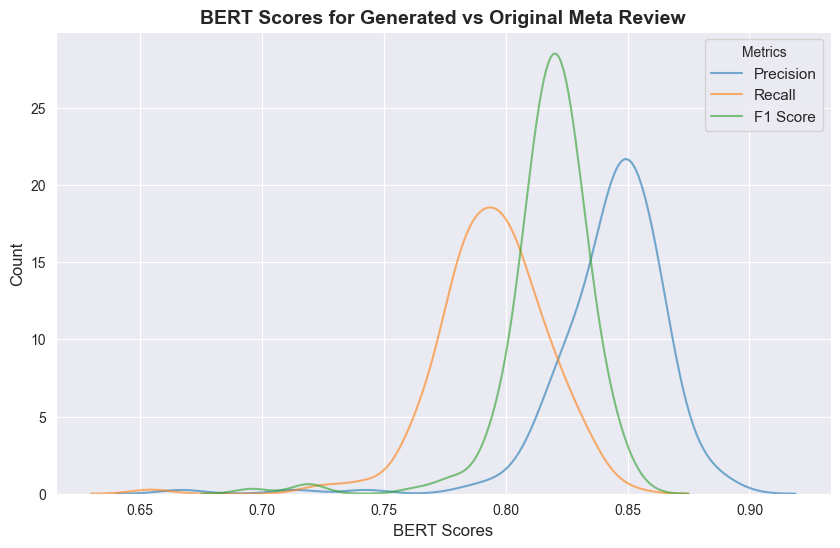

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Define colors for each score
colors = {'Precision': "#1f77b4", 'Recall': "#ff7f0e", 'F1 Score': "#2ca02c"}

# Define bin size of 0.1
bins = np.arange(0.5, 1, 0.05)

# Create figure
plt.figure(figsize=(10, 6))

# Plot histograms with KDE for each BERT Score metric
sns.kdeplot(bert_df['BERTScore_P'], color=colors['Precision'], label="Precision", alpha=0.6)
sns.kdeplot(bert_df['BERTScore_R'], color=colors['Recall'], label="Recall", alpha=0.6)
sns.kdeplot(bert_df['BERTScore_F1'], color=colors['F1 Score'], label="F1 Score", alpha=0.6)

# Labels and Title
plt.xlabel("BERT Scores", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("BERT Scores for Generated vs Original Meta Review", fontsize=14, fontweight='bold')

# Add legend
plt.legend(title="Metrics", fontsize=11)

# Show plot
plt.show()

### BERT Score shows the similarity in meaning of the two comparison statements

# Analysis

### 1. Generated vs Original Meta Review (hist)
The generated meta review is highly matching with the original meta review present in the dataset. It means, the semantics highly match which is a good sign that we have nearly achieved what we wanted.

### 2. BLEU Score and Rouge Score (words match metrics)
No comments, but less

### 3. Jaccard Similarity
Low, because AI Generated meta review wordings are different than original meta reviews present in the dataset.

##### COMBINED THE ABOVE TWO : AI-generated reviews are not copying exact words but are capturing the overall meaning fairly well

### BERT Score (combined KDE) - similarity in meaning of the two comparison statements
High match of Precision, Recall and F1 Score - target achieved